In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
orders = pd.read_csv('../data/orders.csv', parse_dates=['order_time', 'delivery_time'])
customers = pd.read_csv('../data/customers.csv')
couriers = pd.read_csv('../data/couriers.csv')
incidents = pd.read_csv('../data/incidents.csv')

In [3]:
orders.head()
orders.info()
orders.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_id         2000 non-null   int64         
 1   customer_id      2000 non-null   int64         
 2   courier_id       2000 non-null   int64         
 3   region           2000 non-null   object        
 4   order_time       2000 non-null   datetime64[ns]
 5   delivery_time    2000 non-null   datetime64[ns]
 6   total_amount     2000 non-null   float64       
 7   customer_rating  1676 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(1)
memory usage: 125.1+ KB


,order_id,customer_id,courier_id,order_time,delivery_time,total_amount,customer_rating
count,2000.000000,2000.00000,2000.000000,2000,2000,2000.000000,1676.000000
mean,1000.500000,150.61000,25.633500,2025-03-25 17:27:57.808500224,2025-03-25 18:20:35.248499968,65.492750,3.001193
min,1.000000,1.00000,1.000000,2025-03-10 13:17:09,2025-03-10 14:09:44,10.030000,1.000000
25%,500.750000,76.00000,13.000000,2025-03-18 05:36:46.750000128,2025-03-18 06:50:40.249999872,37.980000,2.000000
50%,1000.500000,146.00000,25.000000,2025-03-25 18:07:45.500000,2025-03-25 19:03:15.500000,65.395000,3.000000
75%,1500.250000,227.25000,38.000000,2025-04-02 02:18:33.500000,2025-04-02 02:55:28.249999872,92.320000,4.000000
max,2000.000000,300.00000,50.000000,2025-04-09 13:00:43,2025-04-09 14:15:43,119.990000,5.000000
std,577.494589,86.97199,14.450764,NaN,NaN,31.879153,1.411255


In [4]:
orders['delivery_duration'] = (orders['delivery_time'] - orders['order_time']).dt.total_seconds() / 60


<Axes: title={'center': 'Number of Orders per Region'}, xlabel='region'>

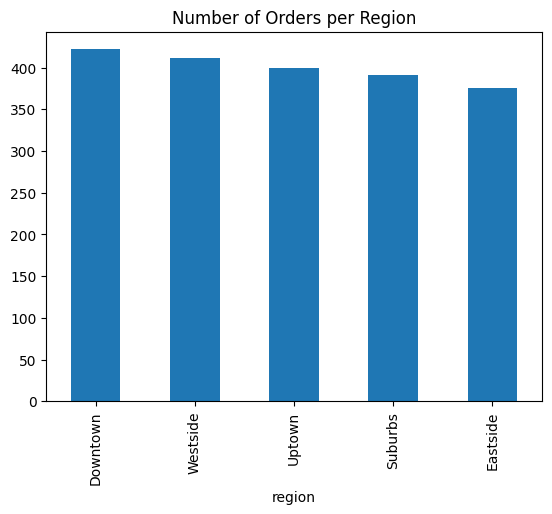

In [5]:
orders['region'].value_counts().plot(kind='bar', title='Number of Orders per Region')


<Axes: title={'center': 'Customer Ratings Distribution'}, xlabel='customer_rating'>

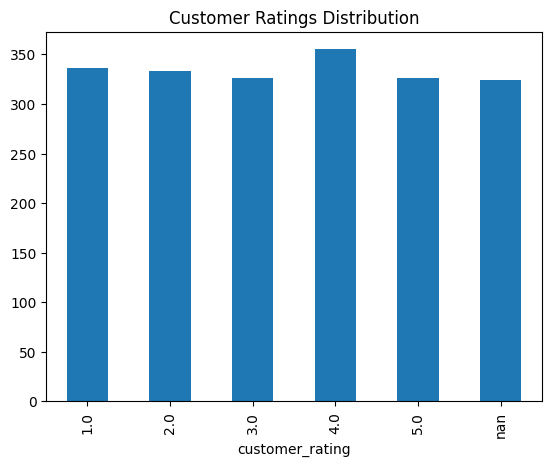

In [6]:
orders['customer_rating'].value_counts(dropna=False).sort_index().plot(kind='bar', title='Customer Ratings Distribution')


<Axes: title={'center': 'Top Incident Types'}, xlabel='incident_type'>

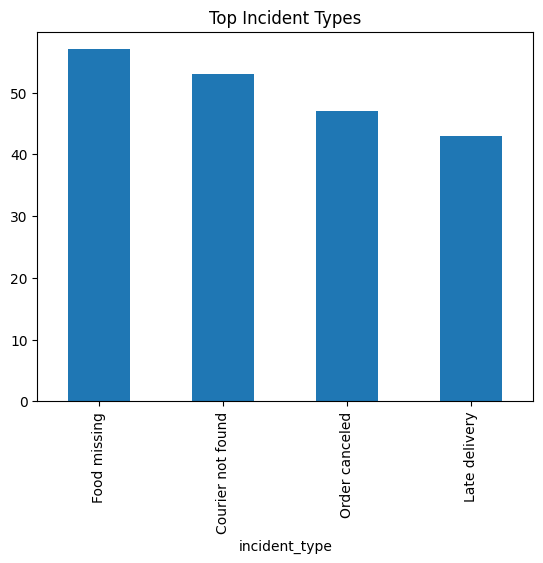

In [7]:
incidents['incident_type'].value_counts().plot(kind='bar', title='Top Incident Types')


<Axes: title={'center': 'Incidents per Region'}, xlabel='region'>

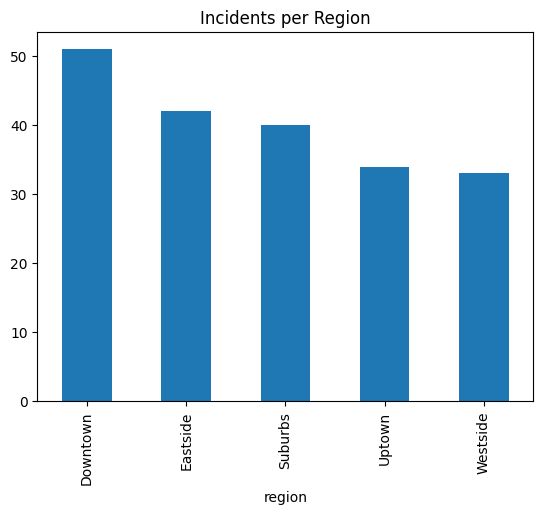

In [8]:
merged = orders.merge(incidents, on='order_id')
merged['region'].value_counts().plot(kind='bar', title='Incidents per Region')


In [13]:


orders = pd.read_csv("../data/orders.csv", parse_dates=["order_time"])

# Arredondar para a hora
orders["hour"] = orders["order_time"].dt.floor("H")

# Agrupar por hora e região
orders_by_hour_region = orders.groupby(["hour", "region"]).size().reset_index(name="order_count")

print(orders_by_hour_region.head())


                 hour    region  order_count
0 2025-03-10 13:00:00  Downtown            1
1 2025-03-10 13:00:00  Westside            3
2 2025-03-10 14:00:00  Eastside            1
3 2025-03-10 15:00:00   Suburbs            1
4 2025-03-10 16:00:00  Downtown            1


C:\Users\joaom\AppData\Local\Temp\ipykernel_33408\3195791557.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  orders["hour"] = orders["order_time"].dt.floor("H")


In [14]:
selected_region = "Downtown"

df_region = orders_by_hour_region[orders_by_hour_region["region"] == selected_region][["hour", "order_count"]]
df_region = df_region.rename(columns={"hour": "ds", "order_count": "y"})  # formato exigido pelo Prophet

print(df_region.tail())


                      ds  y
1499 2025-04-08 18:00:00  1
1518 2025-04-09 01:00:00  1
1521 2025-04-09 02:00:00  1
1530 2025-04-09 07:00:00  1
1539 2025-04-09 12:00:00  1
